<a href="https://colab.research.google.com/github/JaneSams/Fake-News-Project/blob/main/Fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem:** 
With the fast global world we have news streaming fast between all social networks and to online news websites, where the competition is measuring who will get it faster and better. Naturally fake news was a by-product of that situation and by other factors (such as political interests etc). 

**Goal**: Create an automatic tool based on machine and deep learning that will classify every new item if it’s a True/False news. The tool can be added to every online newspaper (Ynet for example) or any social network that wants to invalidate fake news  for increasing their credibility to their audience.

# Importing liabries and Data Understanding

In [1]:
# Imports relevant modules
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#general tools
import numpy as np
import pandas as pd
import scipy as sp
from numpy import mean

#SKL
from sklearn.preprocessing import LabelEncoder

#visualization
import matplotlib.pyplot as plt
from plotly.offline import iplot
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score ,StratifiedShuffleSplit, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import make_scorer, fbeta_score, matthews_corrcoef, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.preprocessing.text import one_hot
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pydot



The data comes from Kaggle, you can download it here: https://www.kaggle.com/competitions/fake-news/data

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c fake-news

 52% 24.0M/46.5M [00:00<00:00, 135MB/s] 
100% 46.5M/46.5M [00:00<00:00, 173MB/s]


In [7]:
!unzip fake-news.zip

Archive:  fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [8]:
from pathlib import Path
import os

In [9]:
def read_data(filename,**kwargs):
    raw_data=pd.read_csv(filename,**kwargs)
    return raw_data

In [10]:
# Setup Directory Path

root_dir = str(Path().resolve())
input_dir = root_dir+"/input/"
if not os.path.isdir(input_dir):
    os.mkdir(input_dir)
output_dir = root_dir+"/output/"
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
model_dir = root_dir+"/model/"
if not os.path.isdir(model_dir):
    os.mkdir(model_dir)
image_dir = 'images/'
print(root_dir)

/content


# **READ DATA**

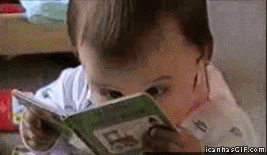

In [11]:

news_df= read_data("train.csv")
submit_test = read_data('test.csv')
submit_label = read_data('submit.csv')
submit_test['label'] = submit_label.label
print(" Shape of News data :: ", news_df.shape)
print(" News data columns", news_df.columns)
print(" Test columns", submit_test.columns)
news_df.head()

 Shape of News data ::  (20800, 5)
 News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
 Test columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
submit_test.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [13]:
submit_label.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

1: unreliable

0: reliable

In [14]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [15]:
news_df.loc[news_df['id']==788]


,id,title,author,text,label
788,788,Women won't earn the same as men for another t...,NaN,"Thu, 27 Oct 2016 11:40 UTC © Joshua Lott / Reu...",1


In [16]:
news_df.loc[news_df['id']==841]

,id,title,author,text,label
841,841,Scientists say weird signals from space are 'p...,Xcathdra,Scientists say weird signals from space are ‘p...,1


The classes in the dataset are balanced

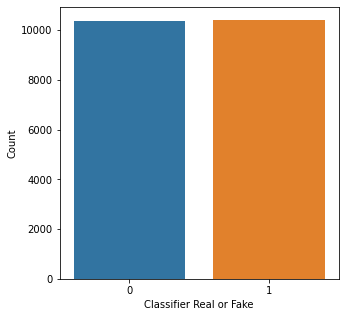

In [ ]:
# Visualizing the count of 'Label' column from the dataset

plt.figure(figsize=(5,5))
sns.countplot(x='label', data=news_df)
plt.xlabel('Classifier Real or Fake')
plt.ylabel('Count')
plt.show()


In [ ]:
news_df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

We’ll take a look at the number of characters present in each title and new’s text by the label. This can give us a rough idea about the news headline length.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b35c7c990>,
      dtype=object)

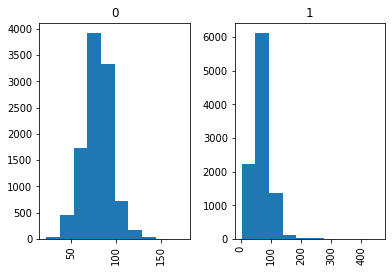

In [ ]:
#  the number of characters present in each title by labels
news_df['title'].str.len().hist(by=news_df['label'])

In [ ]:
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# **Data Cleaning**

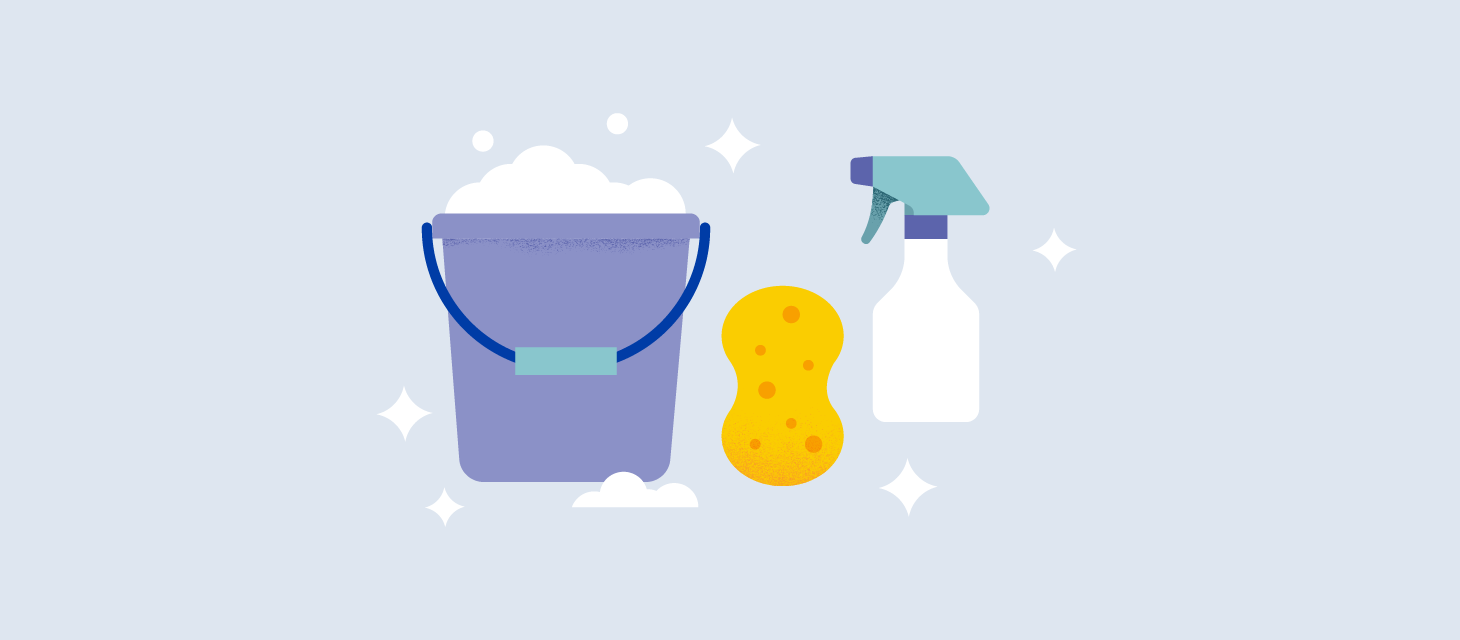

Handling of Null value

Remove special characters

Remove stop words



In [ ]:
# replacing the null values with empty string
news_df = news_df.fillna('')
# checking the number of missing values in the dataset
news_df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
#Remove special characters
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
news_df['title_wo_punct']=news_df['title'].apply(lambda x: remove_punctuation(x))
news_df.head()

,id,title,author,text,label,title_wo_punct
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide We Didn’t Even See Comey’s Lett...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,FLYNN Hillary Clinton Big Woman on Campus Bre...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [ ]:
# merging the author name and news title
news_df['content'] = news_df['author']+' '+news_df['title']
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
news_df['content']=news_df['content'].apply(lambda x: remove_punctuation(x))



Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc.  Since we are only dealing with English news we will filter the English stopwords 

In [ ]:
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
## Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
## Nltk Preprocessing include:
# Stop words,
# Stemming and
# Lemmetization
# For our project we use only Stop word removal
def nltk_preprocesing(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text


news_df["text"] = news_df.text.apply(nltk_preprocesing)
news_df["title"] = news_df.title.apply(nltk_preprocesing)
news_df['content'] = news_df.content.apply(nltk_preprocesing)
news_df['author']=news_df.author.apply(nltk_preprocesing)
news_df['title_wo_punct']=news_df['title_wo_punct'].apply(nltk_preprocesing)

In [ ]:
#text without punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
news_df['text_wo_punct']=news_df['text'].apply(lambda x: remove_punctuation(x))
news_df.head()

,id,title,author,text,label,title_wo_punct,content,text_wo_punct
0,0,house dem aide didnt even see comeys letter ja...,darrell lucus,house dem aide didnt even see comeys letter ja...,1,house dem aide didnt even see comeys letter ja...,darrell lucus house dem aide didnt even see co...,house dem aide didnt even see comeys letter ja...
1,1,flynn hillary clinton big woman campus breitbart,daniel j flynn,ever get feeling life circle roundabout rather...,0,flynn hillary clinton big woman campus breitbart,daniel j flynn flynn hillary clinton big woman...,ever get feeling life circle roundabout rather...
2,2,truth might get fired,consortiumnewscom,truth might get fired october 29 2016 tension ...,1,truth might get fired,consortiumnewscom truth might get fired,truth might get fired october 29 2016 tension ...
3,3,15 civilian killed single u airstrike identified,jessica purkiss,video 15 civilian killed single u airstrike id...,1,15 civilian killed single u airstrike identified,jessica purkiss 15 civilian killed single u ai...,video 15 civilian killed single u airstrike id...
4,4,iranian woman jailed fictional unpublished sto...,howard portnoy,print iranian woman sentenced six year prison ...,1,iranian woman jailed fictional unpublished sto...,howard portnoy iranian woman jailed fictional ...,print iranian woman sentenced six year prison ...


In [ ]:
# Remove column "id"
news_df = news_df.drop(['id'],axis=1)

In [ ]:
## Constants Used for cleaning the datasets

# column_names = ['id', 'title', 'author', 'text', 'label']
# remove_columns = ['id']
# categorical_features = []
# target_col = ['label']
# text_features = ['title', 'text']

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Exploratory Data Analysis**

Lets Take a look at the Word Clouds for the Titles

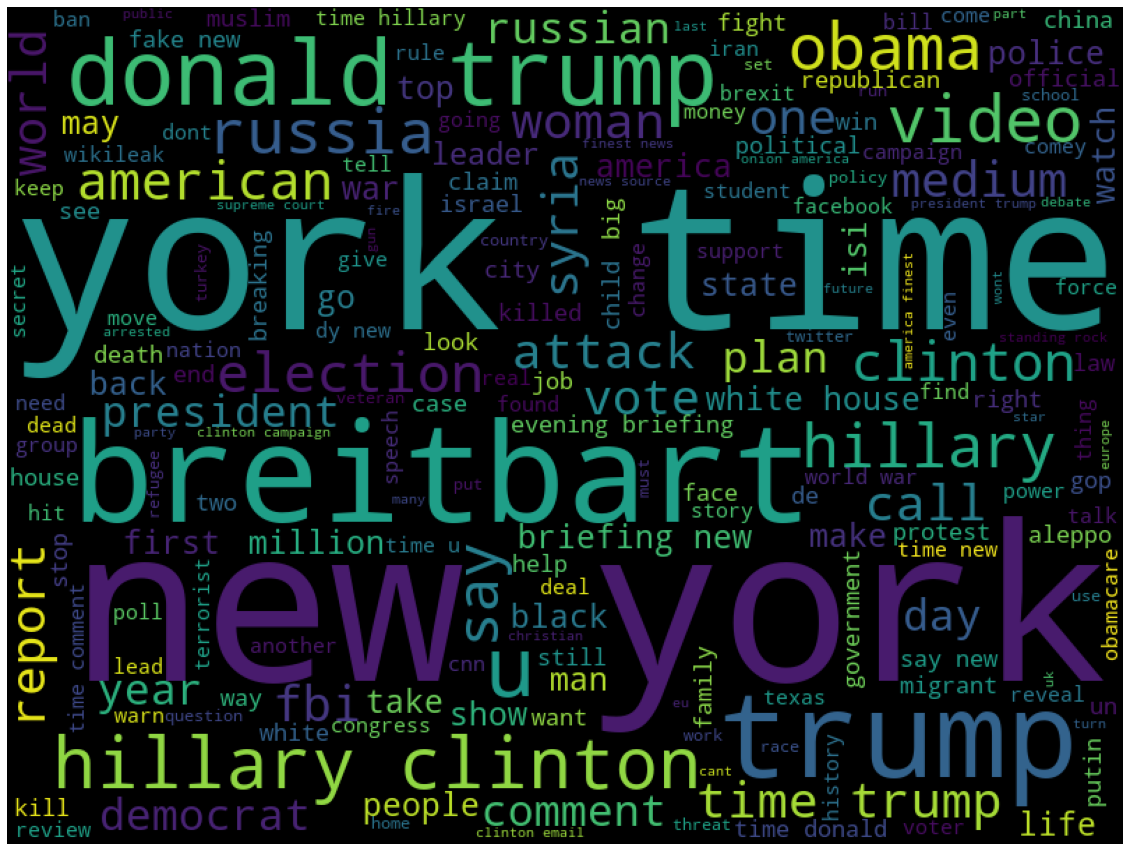

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud( background_color='black', width=800, height=600)

text_cloud = wordcloud.generate(' '.join(news_df['title_wo_punct']))

plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

In [ ]:
news_df_true = news_df.loc[news_df['label'] == 0]
news_df_false = news_df.loc[news_df['label'] == 1]

In [ ]:
# Ngram analysis function
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

[Text(0.5, 1.0, 'Title fake news')]

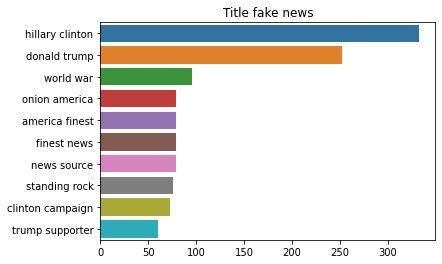

In [ ]:
#Title fake news
top_n_bigrams=get_top_ngram(news_df_false['title_wo_punct'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Title fake news')

[Text(0.5, 1.0, 'Title fake news')]

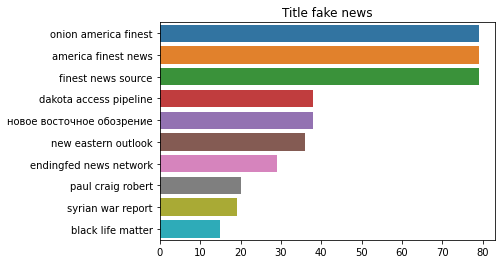

In [ ]:
#Title fake news (3 words)
top_n_bigrams=get_top_ngram(news_df_false['title_wo_punct'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Title fake news')

[Text(0.5, 1.0, 'Title true news')]

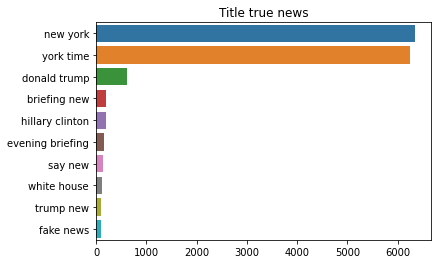

In [ ]:
#Title true news
top_n_bigrams=get_top_ngram(news_df_true['title_wo_punct'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Title true news')

[Text(0.5, 1.0, 'Title true news')]

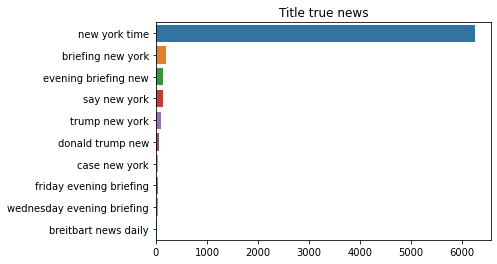

In [ ]:
#Title true news (3 words)
top_n_bigrams=get_top_ngram(news_df_true['title_wo_punct'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Title true news')

[Text(0.5, 1.0, 'Text fake news')]

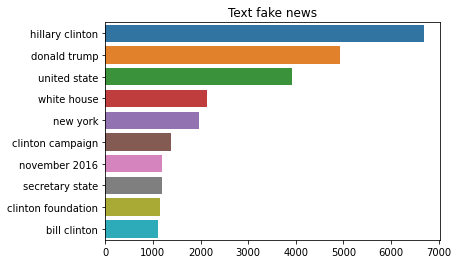

In [ ]:
#Text fake news
top_n_bigrams=get_top_ngram(news_df_false['text_wo_punct'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Text fake news')

[Text(0.5, 1.0, 'Text fake news')]

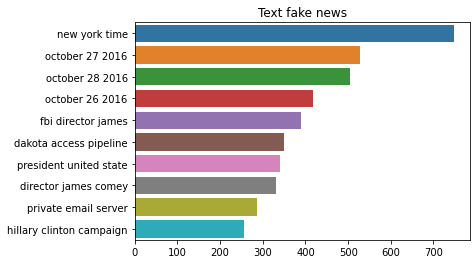

In [ ]:
#Text fake news (3 words)
top_n_bigrams=get_top_ngram(news_df_false['text_wo_punct'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Text fake news')

[Text(0.5, 1.0, 'Text true news')]

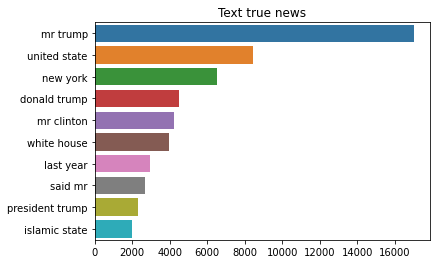

In [ ]:
#Text true news
top_n_bigrams=get_top_ngram(news_df_true['text_wo_punct'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Text true news')

[Text(0.5, 1.0, 'Text true news')]

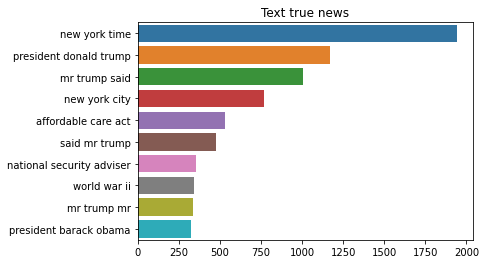

In [ ]:
#Text true news (3 words)
top_n_bigrams=get_top_ngram(news_df_true['text_wo_punct'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set(title='Text true news')

Title and text of fake and not fake news is different and the order of the words is also different

In [ ]:
news_df_true['author'].value_counts()

pam key                                  242
jerome hudson                            166
charlie spiering                         141
john hayward                             140
katherine rodriguez                      124
                                        ... 
kenneth chang mike isaac matt richtel      1
cecilia kang michael shear                 1
adam nagourney jonathan martin             1
france roble kirk semple                   1
michael j de la merced rachel abrams       1
Name: author, Length: 2225, dtype: int64

In [ ]:
news_df_false['author'].value_counts()

                           1932
admin                       234
author                      111
pakalert                     86
eddy lavine                  85
                           ... 
jdhank                        1
johnnygl                      1
well                          1
connectdots                   1
judge andrew napolitano       1
Name: author, Length: 1968, dtype: int64

We can see that unknown authors can give fake news

In [ ]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(news_df['text_wo_punct'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
# df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in text news')

said 80008
mr 71386
trump 55876
one 39756
state 37440
would 37232
people 36862
year 31986
time 29989
new 29986
clinton 28103
like 26636
also 25430
president 25391
american 22072
could 19296
many 19192
even 18875
government 17794
country 17604


In [ ]:
groups=df1.groupby('news').sum()['count'].sort_values(ascending=False)

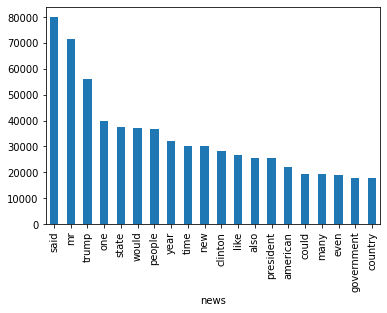

In [ ]:
groups.plot.bar()

In [ ]:
common_words_true = get_top_n_words(news_df_true['text_wo_punct'], 20)

#Printing the word and frequency
for word, freq in common_words_true:
    print(word, freq)

#Creating the dataframe of word and frequency
common_true = pd.DataFrame(common_words_true, columns = ['news' , 'count'])

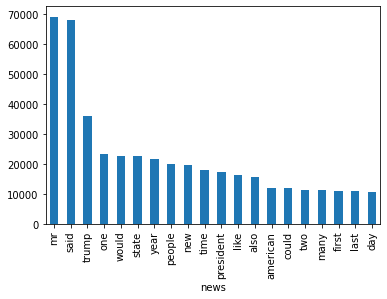

In [ ]:
groups_true=common_true.groupby('news').sum()['count'].sort_values(ascending=False)
groups_true.plot.bar()

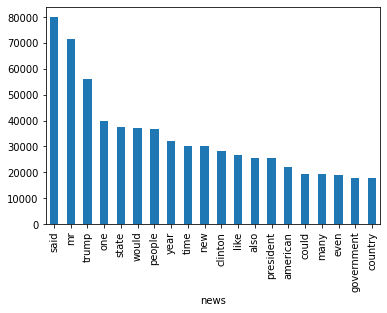

We can see Top 20 words in text news

In [ ]:
#Save in csv
news_df.to_csv("news_df.csv", index = False)

# 01_content_model

In [ ]:
content_features=news_df[['content']].reset_index(drop=True)
content_features.head()

,content
0,darrell lucus house dem aide didnt even see co...
1,daniel j flynn flynn hillary clinton big woman...
2,consortiumnewscom truth might get fired
3,jessica purkiss 15 civilian killed single u ai...
4,howard portnoy iranian woman jailed fictional ...


In [ ]:
# STEMMING:

# A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.
# In simple words, Stemming is the process of reducing a word to its Root word.

# EXAMPLES:

# actor, actress, acting --> act
# eating, eats, eaten --> eat
port_stem = PorterStemmer()

def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review


In [ ]:
corpus=[]
for i in range (0,len(content_features)):
    review = re.sub('[^a-zA-Z]',' ',content_features['content'][i])
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review) #Getting the target variable

y=news_df['label']

In [ ]:
news_df['content'] = news_df['content'].apply(stemming)
print(news_df['content'])

0        darrel lucu hous dem aid didnt even see comey ...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnewscom truth might get fire
3        jessica purkiss civilian kill singl u airstrik...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper ti trump poster child whit...
20796    benjamin hoffman nfl playoff schedul matchup o...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = news_df['content'].values
y = news_df['label'].values
print(X)
print(y)

['darrel lucu hous dem aid didnt even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnewscom truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


In [ ]:
# TF-IDF stands for “Term Frequency – Inverse Document Frequency ”

# TF-IDF is a numerical statistic which measures the importance of the word in a document.

# Term Frequency : Number of time a word appears in a text document.

# Inverse Document Frequency : Measure the word is a rare word or common word in a document.
# converting the textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X)

  (0, 16882)	0.2744592444374437
  (0, 14494)	0.24777447435872538
  (0, 9588)	0.34805490263423844
  (0, 9274)	0.2796386126995312
  (0, 8297)	0.23725805939064787
  (0, 7575)	0.21013697798700734
  (0, 5324)	0.22334412146584304
  (0, 4305)	0.2840070081977437
  (0, 4080)	0.25896963868992834
  (0, 3877)	0.3445106979827108
  (0, 3205)	0.23629392780243347
  (0, 2698)	0.35193713958172035
  (0, 281)	0.25980951706150995
  (1, 18076)	0.2651224244774067
  (1, 7366)	0.1942845078307169
  (1, 5961)	0.7259018437262811
  (1, 3842)	0.2680101511775919
  (1, 3039)	0.19490351694336977
  (1, 2424)	0.3743002902067431
  (1, 2078)	0.15775424720747128
  (1, 1650)	0.30037678258980904
  (2, 16803)	0.4405619707768525
  (2, 10322)	0.5182114550299733
  (2, 6462)	0.3648490352377015
  (2, 5829)	0.41085048965215354
  :	:
  (20797, 14131)	0.24830376612959398
  (20797, 13305)	0.27269072932613864
  (20797, 13090)	0.2478336113391485
  (20797, 11056)	0.0804029462273288
  (20797, 10288)	0.1745894318504674
  (20797, 10217)	0.2

In [ ]:
# SPLITTING THE DATASET INTO TRAINING DATA & TEST DATA:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [ ]:
X_all = news_df.drop('label',axis=1)
Y_all = news_df['label']

In [ ]:
# Applying the model on the full dataset
X_all = X_all.apply(stemming)

In [ ]:
Xall_train, Xall_test, yall_train, yall_test = train_test_split(X_all, Y_all, test_size = 0.2, stratify=Y_all, random_state=2)

In [ ]:
# LOGISTIC REGRESSION for ALL:
model_all = LogisticRegression()
model_all.fit(Xall_train, yall_train)

# accuracy score on the training data
X_train_prediction_all = model_all.predict(Xall_train)
training_data_accuracy_all = round(accuracy_score(X_train_prediction_all, yall_train)*100,3)

print('Accuracy score of the training data,%: ', training_data_accuracy_all)

In [ ]:
# LOGISTIC REGRESSION:
lg = LogisticRegression()
lg.fit(X_train, y_train)

# accuracy score on the training data
X_train_prediction = lg.predict(X_train)
training_data_accuracy = round(accuracy_score(X_train_prediction, y_train)*100,3)

print('Accuracy score of the training data,%: ', training_data_accuracy)

Accuracy score of the training data,%:  98.726


In [ ]:
#for Test Model
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB(alpha=0.1) #It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
dicts = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
models=[lg,dt,knn,nb]

#Printing the accuracy
for i,total in enumerate(models):
    print("{} Test Accuracy: {}".format(dicts[i],cross_val_score(total, X_test, y_test, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.951201923076923
Decision Tree Test Accuracy: 0.9795673076923077
KNN Test Accuracy: 0.5084134615384615
Naive Bayes Test Accuracy: 0.9221153846153847


In [ ]:
#For Train Model
from sklearn.naive_bayes import MultinomialNB
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB(alpha=0.1) 
dicts = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
models=[lg,dt,knn,nb]

#Printing the accuracy
for i,total in enumerate(models):
    print("{} Train Accuracy: {}".format(dicts[i],cross_val_score(total, X_train, y_train, cv=10, scoring ='accuracy').mean()))

Logistic Regression Train Accuracy: 0.9746995192307694
Decision Tree Train Accuracy: 0.99296875
KNN Train Accuracy: 0.5207932692307693
Naive Bayes Train Accuracy: 0.95


In [ ]:
# CONFUSION MATRIX:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# accuracy score on the test data
X_test_prediction = lg.predict(X_test)
test_data_accuracy = round(accuracy_score(X_test_prediction, y_test)*100,3)
print('Accuracy score of the test data, % : ', test_data_accuracy)

Accuracy score of the test data, % :  97.788


In [ ]:
print(classification_report(y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8310
           1       0.98      0.99      0.99      8330

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



In [ ]:

print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.96      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.33, random_state=42)
# CLASSIFICATION MODEL : MULTINOMIAL NAIVE BAYES

# Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP)

# Multinomial Naïve Bayes uses term frequency i.e. the number of times a given term appears in a document. Term frequency is often normalized by dividing the raw term frequency by the document length

#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.950
Confusion matrix, without normalization


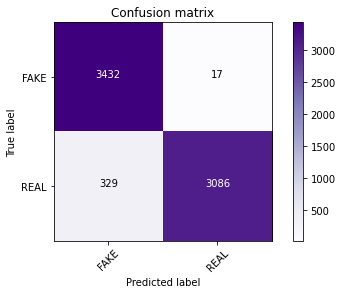

In [ ]:
# Test prediction
classifier.fit(X1_train, y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(y1_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])


accuracy:   0.979
Confusion matrix, without normalization


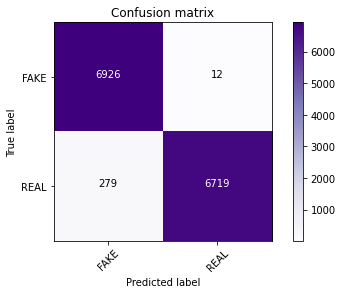

In [ ]:
# Train prediction
classifier.fit(X1_train, y1_train)
prediction1 = classifier.predict(X1_train)
score = metrics.accuracy_score(y1_train, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(y1_train, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

accuracy:   0.990
Confusion matrix, without normalization


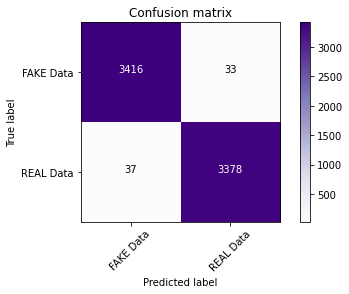

In [ ]:
# CLASSIFICATION MODEL : PASSIVE AGGRESSIVE CLASSIFIER

# Passive Aggressive Classifier works by responding as passive for correct classifications and responding as aggressive for any miscalculation.
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.33, random_state=42)
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

#Test prediction
linear_clf.fit(X2_train, y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

accuracy:   1.000
Confusion matrix, without normalization


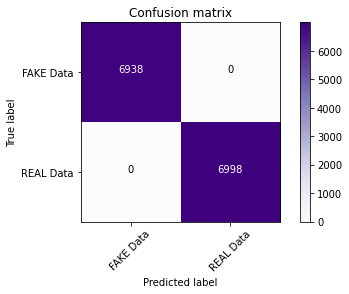

In [ ]:
#Train prediction
prediction2 = linear_clf.predict(X2_train)
score = metrics.accuracy_score(y2_train, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(y2_train, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

In [ ]:
# BUILDING A PREDICTIVE SYSTEM:

# Building a predictive system inorder to find that the inital word in the dataset is real or fake using LogisticRegression model:

X_new = X_test[11]

prediction = lg.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[1]
The news is Fake


In [ ]:
submit_test.iloc[11]

id                                                    20811
title                  “Working Class Hero” by John Brennon
author                                         Doug Diamond
text      Source: CNBC, article by Robert Ferris Arctic ...
label                                                     1
Name: 11, dtype: object

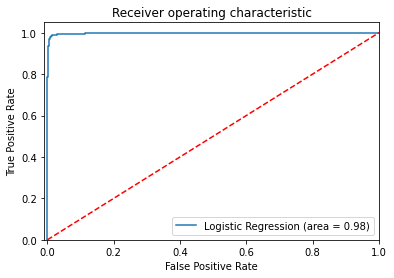

In [ ]:
logit_roc_auc = roc_auc_score(y_test, lg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Building Sequence Model**

In [ ]:
# tensorflow.keras.etc is for TF 1.14
import re
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#####################
###  PARAMS  ###
#####################
sequence_neuron_size = 100
sent_length=5000
hidden_layer_1 = 32 #a layer in between input layers and output layers
epochs = 20         #a number of complete passes through the training dataset
batch_size = 256    #a number of samples processed before the model is updated.
classifier = 'binary'
voc_size = 10000

In [ ]:
#Creating the lstm model
import warnings
warnings.filterwarnings('ignore')
embedding_vector_features=40


model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))


#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 40)          400000    
                                                                 
 dropout (Dropout)           (None, 5000, 40)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


Now let’s train the model.

In [ ]:
#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [ ]:
#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 6913 1502 2694]
 [   0    0    0 ... 6059 7661 4332]
 [   0    0    0 ... 8727 1870 8181]
 ...
 [   0    0    0 ...  100  315 3501]
 [   0    0    0 ... 1593 3131 7609]
 [   0    0    0 ... 5935 9934 6028]]


In [ ]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((20800, 5000), (20800,))

In [ ]:
# Train test split of the X and y final
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train_final,y_train_final,validation_data=(X_test_final,y_test_final),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 60s 242ms/step - loss: 0.4765 - accuracy: 0.7576 - val_loss: 0.2199 - val_accuracy: 0.9232
Epoch 2/10
218/218 [==============================] - 52s 241ms/step - loss: 0.1136 - accuracy: 0.9616 - val_loss: 0.0626 - val_accuracy: 0.9792
Epoch 3/10
218/218 [==============================] - 53s 243ms/step - loss: 0.0227 - accuracy: 0.9941 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 4/10
218/218 [==============================] - 52s 240ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0295 - val_accuracy: 0.9899
Epoch 5/10
218/218 [==============================] - 52s 240ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoch 6/10
218/218 [==============================] - 53s 244ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0313 - val_accuracy: 0.9905
Epoch 7/10
218/218 [==============================] - 52s 238ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0313 - val_ac

Evaluation of model

In [ ]:
# Predicting from test data
y_pred=(model.predict(X_test) > 0.5).astype("int32")



#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [ ]:
#Checking for accuracy
accuracy_score(y_test,y_pred)

In [ ]:
# embedded_docs = pad_sequences(one_hot_repr, padding= 'pre', maxlen= sent_length)
# print(embedded_docs)

In [ ]:
# X= np.array(embedded_docs)
# y= np.array(y)

In [ ]:
#Building Sequential network with
#   Embeding Layer
#   LSTM
#   Dense
#   Output Layer

In [ ]:
# def build_network_lstm(embedding_layer):
    
#     print(" Building Sequential network ")
#     model = Sequential()
#     model.add(embedding_layer)
#     model.add(LSTM(sequence_neuron_size))#, return_sequences=True))
#     #model.add(LSTM(100))    
#     model.add(Dropout(0.2))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# def build_network_GRU(embedding_layer):

#     print(" Building GRU network ")
#     model = Sequential()
#     model.add(embedding_layer)
#     model.add(GRU(sequence_neuron_size))#, return_sequences=True))
#     model.add(Dropout(0.3))
#     model.add(Dense(hidden_layer_1, activation='relu'))
#     model.add(Dropout(0.3))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# def build_network_RNN(embedding_layer):

#     print(" Building RNN network ")
#     model = Sequential()
#     model.add(embedding_layer)
#     model.add(SimpleRNN(sequence_neuron_size))#, return_sequences=True))
#     model.add(Dropout(0.3))
#     model.add(Dense(hidden_layer_1, activation='relu'))
#     model.add(Dropout(0.3))
#     model.add(Dense(1, activation='sigmoid'))
#     return model


In [ ]:
# def train_model(model,X_train,y_train,X_test, y_test):
    
#     # Compile Model with loss function, 
#     # optimizer and metricecs as minimum parameter
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# #     print(model.summary())
    
#     # Train model with Train and test set data
#     # Number of epochs, batch size as minimum parameter
#     history = model.fit(X_train, y_train, epochs=epochs,batch_size = batch_size ,validation_split=0.2)#validation_data=(X_test, y_test))   
#     return model,history

In [ ]:
# def performance_history(history,model_type,name):
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'val'], loc='upper left')
#     plt.show()
# #     plt.savefig(model_dir + image_dir+ model_type+'/' + name + "_performance.jpeg") 

# def model_evaluation(model,X_test,y_test):
#     score = model.evaluate(X_test, y_test, verbose=0)
#     print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
#     return score

In [ ]:
# def store_model(model,model_type,name):
#     # Store the model as json and 
#     # store model weights as HDF5
    
#     # serialize model to JSON
#     model_json = model.to_json()
#     with open(model_dir+model_type+'/'+name+"_model.json", "w") as json_file:
#         json_file.write(model_json)
#     # serialize weights to HDF5
#     model.save_weights(model_dir +model_type+'/'+ name + "_model.h5")
#     print("Saved model to disk")
    


In [ ]:
## Build Network
# model_type='RNN'
# epochs = 20
# batch_size = 256
# name = "Model_" + str(epochs)+dash+str(batch_size)+dash+str(sent_length)+dash+str(batch_size)+dash

# model_rnn = build_network_RNN(embeding_layer)

# model_rnn,history = train_model(model_rnn,train_text_padded,y_train,test_text_padded, y_test)

# 02_models on full dataframe

In [ ]:
all_features=news_df[["title_wo_punct", "content","text_wo_punct"]].reset_index(drop=True)
all_features.head()

,title_wo_punct,content,text_wo_punct
0,house dem aide didnt even see comeys letter ja...,darrel lucu hous dem aid didnt even see comey ...,house dem aide didnt even see comeys letter ja...
1,flynn hillary clinton big woman campus breitbart,daniel j flynn flynn hillari clinton big woman...,ever get feeling life circle roundabout rather...
2,truth might get fired,consortiumnewscom truth might get fire,truth might get fired october 29 2016 tension ...
3,15 civilian killed single u airstrike identified,jessica purkiss civilian kill singl u airstrik...,video 15 civilian killed single u airstrike id...
4,iranian woman jailed fictional unpublished sto...,howard portnoy iranian woman jail fiction unpu...,print iranian woman sentenced six year prison ...


In [ ]:
column_names = ["title_wo_punct", "content","text_wo_punct"]

In [ ]:
port_stem = PorterStemmer()

def stemming(column_names):
    review = re.sub('[^a-zA-Z]',' ',column_names)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
corpus_all=[]
for i in range (0,len(column_names)):
    review = re.sub('[^a-zA-Z]',' ',column_names[i])
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_all.append(review) #Getting the target variable

y_all=news_df['label']

In [ ]:
all_features[["title_wo_punct", "content","text_wo_punct"]] = all_features[["title_wo_punct", "content","text_wo_punct"]].apply(stemming)
print(all_features[["title_wo_punct", "content","text_wo_punct"]])